In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df["Glucose"].unique

<bound method Series.unique of 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64>

<AxesSubplot:>

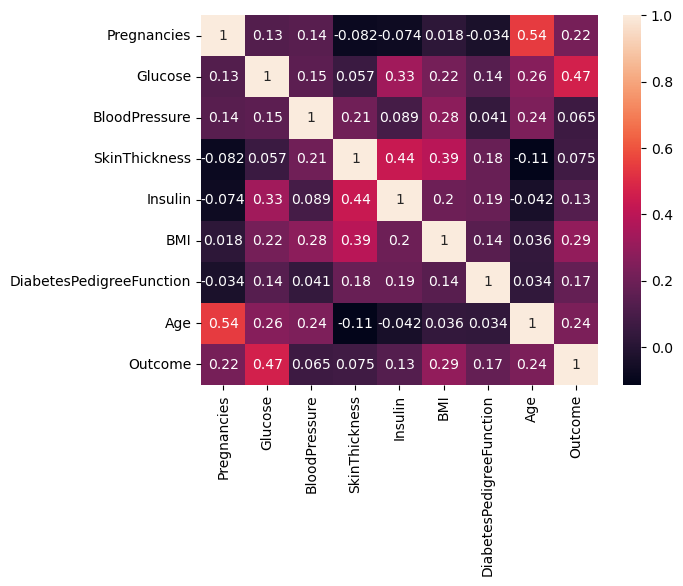

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.columns[0]
len(df.columns)
1!=9

True

In [8]:
mean=df["Glucose"].mean()
mean

120.89453125

In [9]:
mo=df["BMI"].mean()
df["BMI"].median()
df['BMI'].mode()
round(mo,0),df["BMI"].median(),df['BMI'].mode()

(32.0,
 32.0,
 0    32.0
 Name: BMI, dtype: float64)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

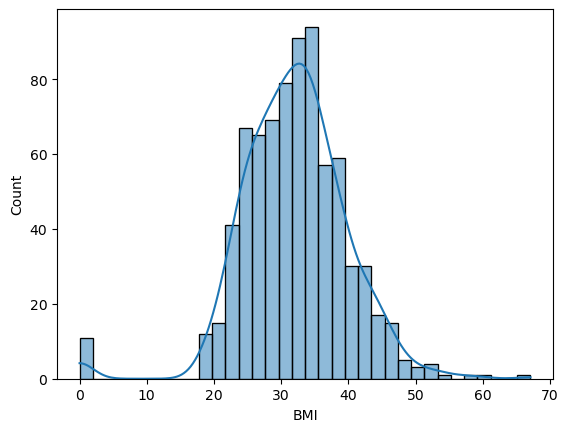

In [10]:
sns.histplot(df['BMI'],kde=True)

In [11]:
import scipy.stats as stats
stats.zscore(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

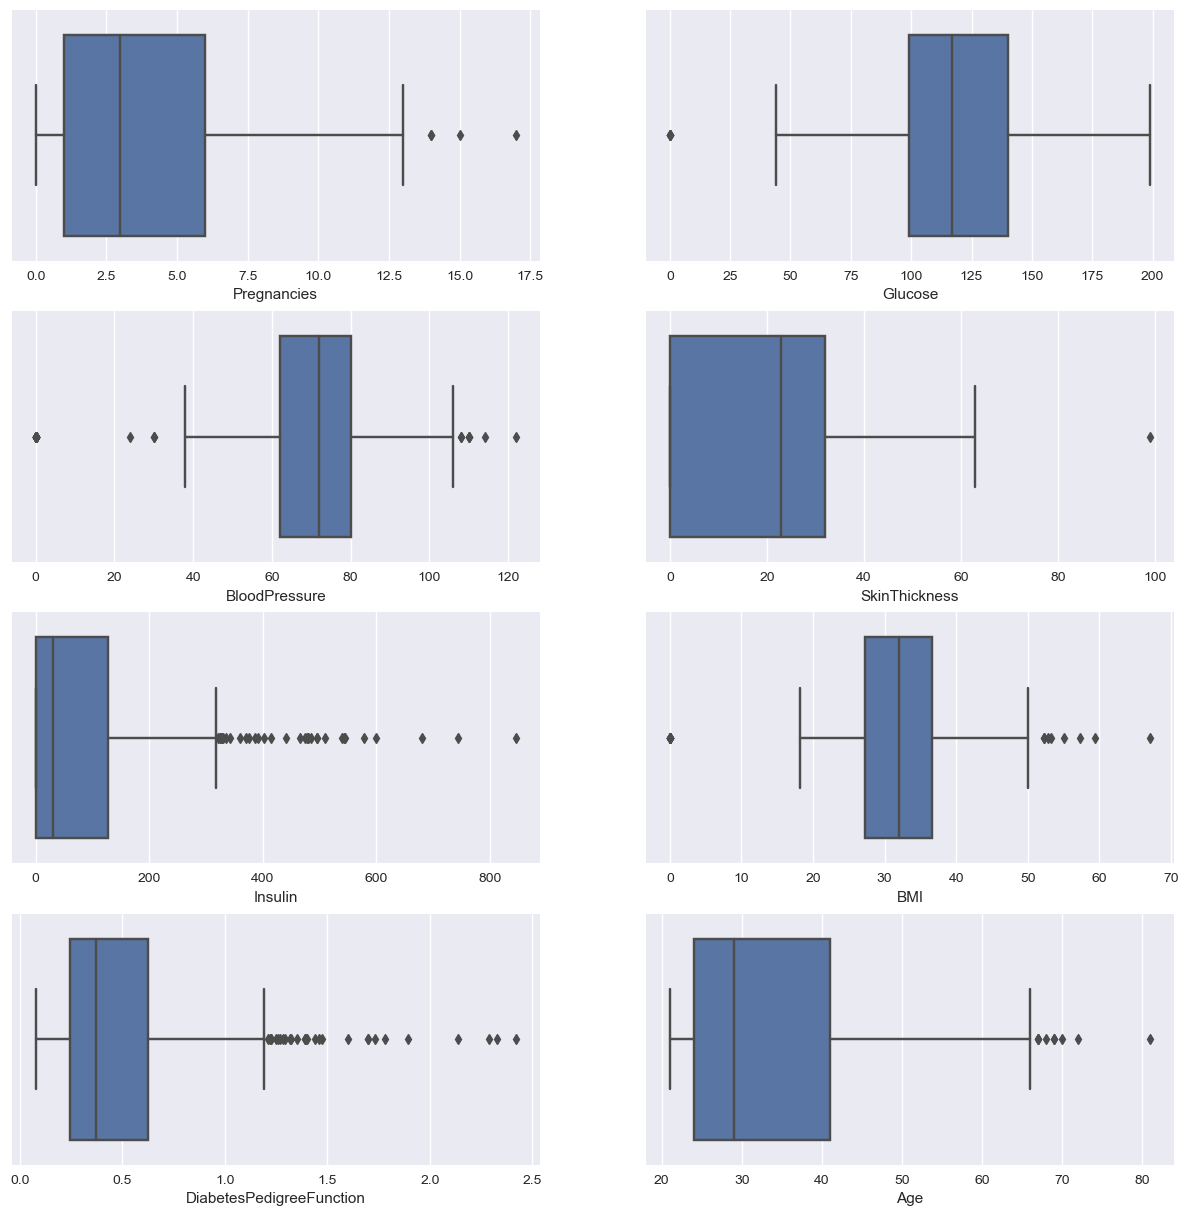

In [12]:
plt.style.use('seaborn')
count=1
plt.figure(figsize=(15,15))

for i in df.columns[:-1]:
    plt.subplot(4,2,count)
    sns.boxplot(df[i]);
    count+=1

In [13]:
Z_list=[]
iqr_list=[]
import statistics
def Z_socre(data):
    for i in data.columns[:-1]:
        mean=round(data[i].mean(),0)
        std=data[i].std()
        mid=data[i].median()
        if mean==mid:
                Z_lower=((data[i]-mean)/std)>3
                Z_upper=((data[i]-mean)/std)<-3
                temp=data[Z_lower].index
                temp_1=data[Z_upper].index
                print(temp,temp_1)
                data.drop(temp , axis = 0,inplace=True)
                data.drop(temp_1 , axis = 0,inplace=True)
                print(data[Z_lower][i],data[Z_upper][i])
        else:
            q1 = data[i].quantile(0.25)
            q3 = data[i].quantile(0.75)
            iqr = q3 - q1 

            upper_whisker = q3 + 1.5* iqr
            lower_whisker = q1 - 1.5* iqr
            if lower_whisker < 0 :
                lower_whisker = 0 
            out_1 = data[i] >  upper_whisker 
            out_2 = data[i] <  lower_whisker
            print(data[out_1][i],data[out_2][i])


            Ser_1 = data[out_1].index
            Ser_2 = data[out_2].index
            data.drop(Ser_1 , axis = 0,inplace=True)
            data.drop(Ser_2 , axis = 0,inplace=True)
            


In [14]:
Z_socre(df)

88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64 Series([], Name: Pregnancies, dtype: int64)
Series([], Name: Glucose, dtype: int64) 75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64
43     110
84     108
106    122
177    110
362    108
549    110
691    114
Name: BloodPressure, dtype: int64 7       0
15      0
18     30
49      0
60      0
78      0
81      0
125    30
172     0
193     0
222     0
261     0
266     0
269     0
300     0
332     0
336     0
347     0
357     0
426     0
430     0
435     0
453     0
468     0
484     0
494     0
522     0
533     0
535     0
589     0
597    24
601     0
604     0
619     0
643     0
697     0
703     0
706     0
Name: BloodPressure, dtype: int64
579    99
Name: SkinThickness, dtype: int64 Series([], Name: SkinThickness, dtype: int64)
8      543
13     846
54     342
111    495
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
37

C:\Users\dell\AppData\Local\Temp\ipykernel_17392\1615491626.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(data[Z_lower][i],data[Z_upper][i])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

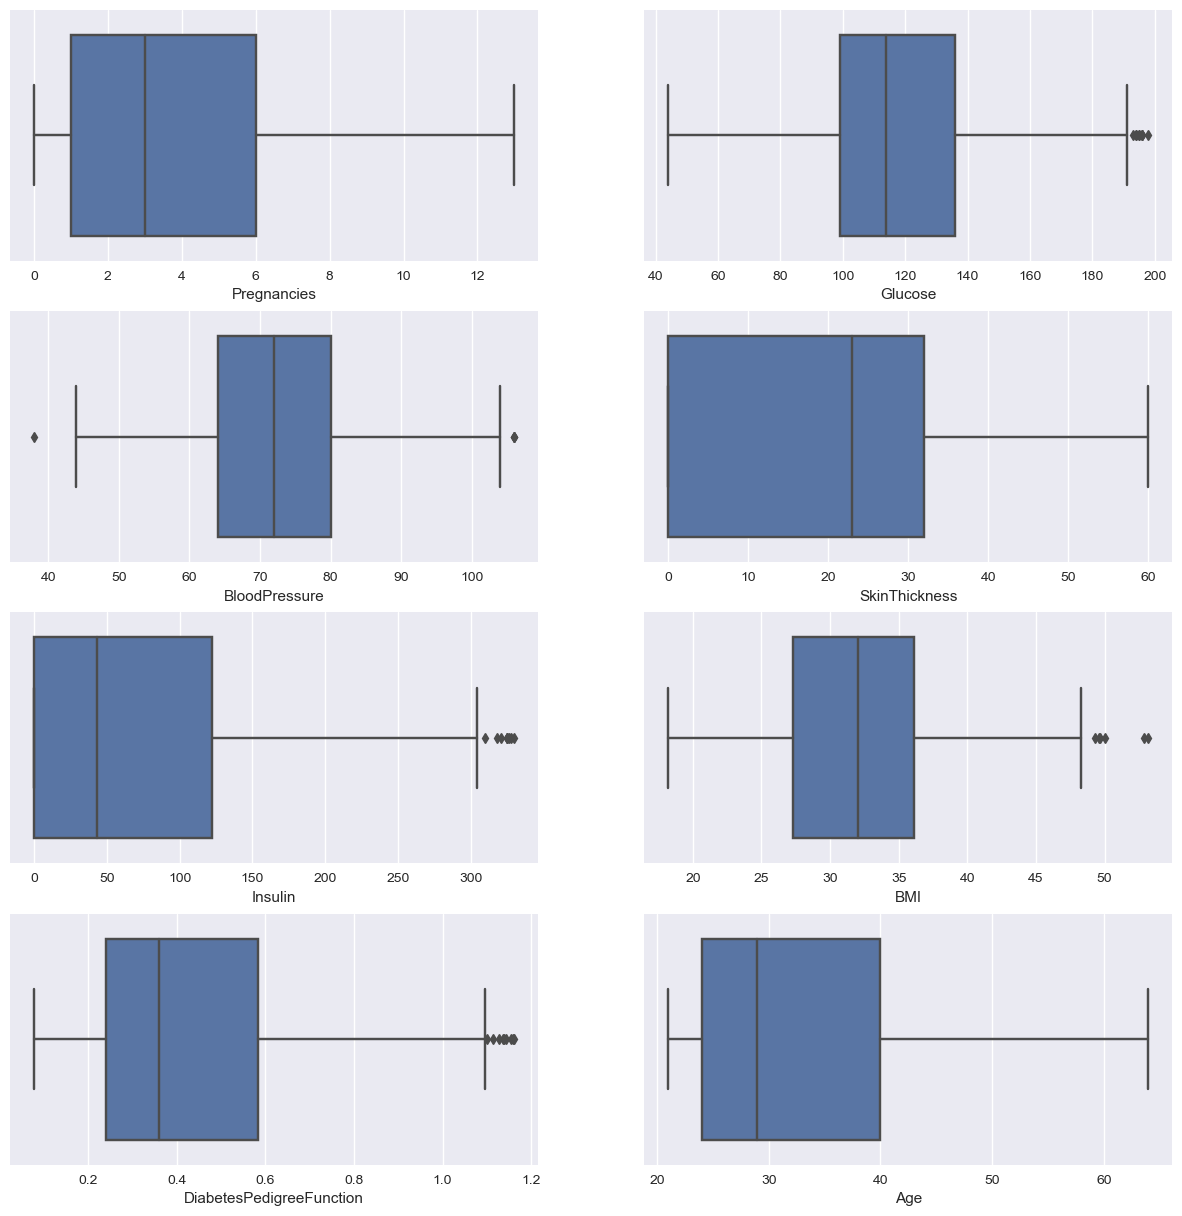

In [16]:
plt.style.use('seaborn')
count=1
plt.figure(figsize=(15,15))

for i in df.columns[:-1]:
    plt.subplot(4,2,count)
    sns.boxplot(df[i]);
    count+=1